# Seattle Bike Counter (Fremont Bridge)

## EDA

### https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x4e85940>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv');
data.head();

In [5]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True);
data.head();

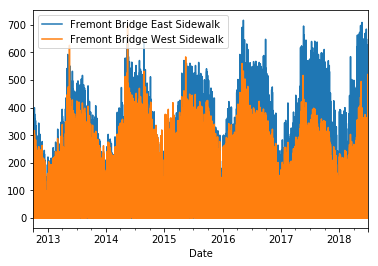

In [6]:
%matplotlib inline
data.plot();

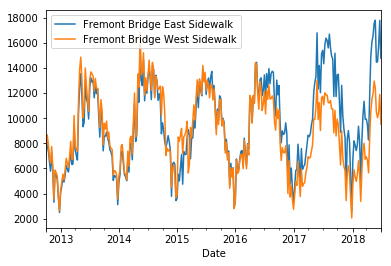

In [7]:
# resample weekly
data.resample('W').sum().plot();

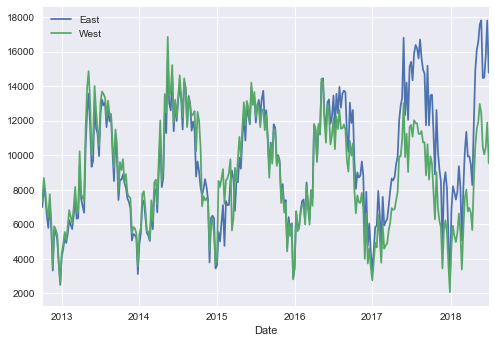

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn');
# matplotlib styles table!
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

data.columns = ['East', 'West'];

data.resample('W').sum().plot();

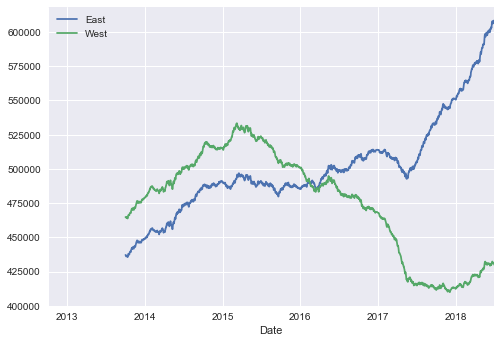

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot();

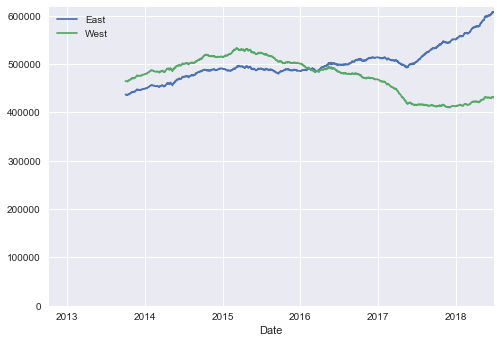

In [10]:
#change is not as drammatic
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

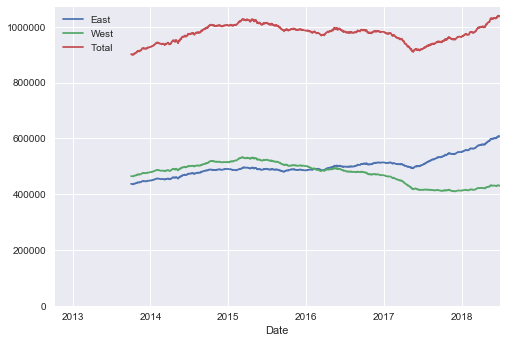

In [11]:
data['Total'] = data['West'] + data['East'];

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

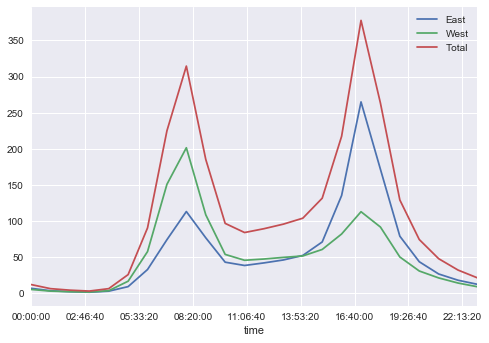

In [12]:
data.groupby(data.index.time).mean().plot();

In [13]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date);
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


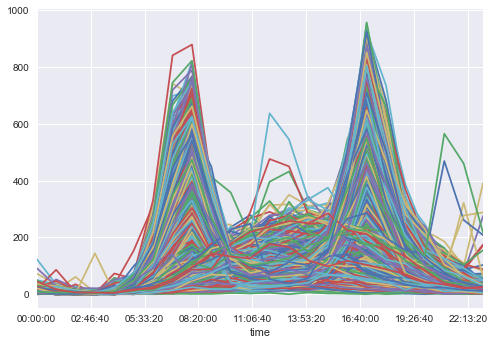

In [14]:
#a line for every day for 6 years!
pivoted.plot(legend=False);

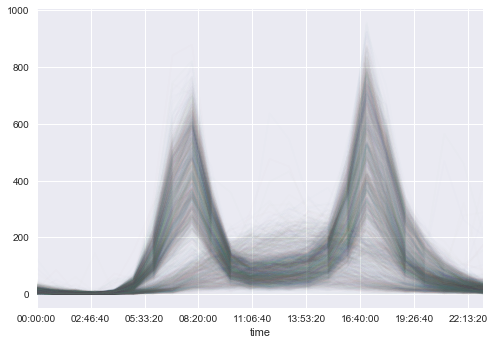

In [15]:
pivoted.plot(legend=False, alpha=0.01);